In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk, re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [2]:
df = pd.read_csv('imdb_reviews.csv', error_bad_lines=False, header=None, delimiter='\t')
df.columns = ['Reviews','Likes']
df

,Reviews,Likes
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1
5,"The rest of the movie lacks art, charm, meanin...",0
6,Wasted two hours.,0
7,Saw the movie today and thought it was a good ...,1
8,A bit predictable.,0
9,Loved the casting of Jimmy Buffet as the scien...,1


In [3]:
#Object Initialization
ps = PorterStemmer()
word_net_lemmatizer = WordNetLemmatizer()
lr = LogisticRegression()

In [4]:
def process_text(reviews):
    review = re.sub('[^a-zA-Z]', ' ', reviews)
    review = review.lower()
    review = review.split()
    review = [word for word in review if not word in set(stopwords.words('english'))]
    review = [word_net_lemmatizer.lemmatize(word) for word in review]
    review = [ps.stem(word) for word in review]
    review = ' '.join(review)
    return review

In [5]:
df['Reviews'] = df['Reviews'].apply(process_text)
df

,Reviews,Likes
0,slow move aimless movi distress drift young man,0
1,sure lost flat charact audienc nearli half walk,0
2,attempt arti black white clever camera angl mo...,0
3,littl music anyth speak,0
4,best scene movi gerardo tri find song keep run...,1
5,rest movi lack art charm mean empti work guess...,0
6,wast two hour,0
7,saw movi today thought good effort good messag...,1
8,bit predict,0
9,love cast jimmi buffet scienc teacher,1


In [6]:
corpus = []

In [7]:
reviews = df.iloc[:,0].values
corpus = list(reviews)
corpus

['slow move aimless movi distress drift young man',
 'sure lost flat charact audienc nearli half walk',
 'attempt arti black white clever camera angl movi disappoint becam even ridicul act poor plot line almost non exist',
 'littl music anyth speak',
 'best scene movi gerardo tri find song keep run head',
 'rest movi lack art charm mean empti work guess empti',
 'wast two hour',
 'saw movi today thought good effort good messag kid',
 'bit predict',
 'love cast jimmi buffet scienc teacher',
 'babi owl ador',
 'movi show lot florida best made look appeal',
 'song best muppet hilari',
 'cool',
 'right case movi deliv everyth almost right face',
 'averag act main person low budget clearli see',
 'review long overdu sinc consid tale two sister singl greatest film ever made',
 'put gem movi term screenplay cinematographi act post product edit direct aspect film make',
 'practic perfect true masterpiec sea faux masterpiec',
 'structur film easili tightli construct histori cinema think film so

In [8]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 2 columns):
Reviews    748 non-null object
Likes      748 non-null int64
dtypes: int64(1), object(1)
memory usage: 91.0 KB


In [9]:
df1 = pd.DataFrame({'Reviews':corpus})
df1

,Reviews
0,slow move aimless movi distress drift young man
1,sure lost flat charact audienc nearli half walk
2,attempt arti black white clever camera angl mo...
3,littl music anyth speak
4,best scene movi gerardo tri find song keep run...
5,rest movi lack art charm mean empti work guess...
6,wast two hour
7,saw movi today thought good effort good messag...
8,bit predict
9,love cast jimmi buffet scienc teacher


In [10]:
vectorizer = CountVectorizer(max_features=2000)
data = vectorizer.fit_transform(corpus)

In [11]:
vectorizer.vocabulary_

{'slow': 1495,
 'move': 1065,
 'aimless': 44,
 'movi': 1066,
 'distress': 559,
 'drift': 589,
 'young': 1993,
 'man': 994,
 'sure': 1632,
 'lost': 968,
 'flat': 767,
 'charact': 313,
 'audienc': 122,
 'half': 823,
 'walk': 1900,
 'attempt': 119,
 'arti': 102,
 'black': 196,
 'white': 1938,
 'clever': 354,
 'camera': 271,
 'angl': 72,
 'disappoint': 544,
 'becam': 165,
 'even': 673,
 'ridicul': 1327,
 'act': 17,
 'poor': 1176,
 'plot': 1162,
 'line': 945,
 'almost': 53,
 'non': 1084,
 'exist': 698,
 'littl': 952,
 'music': 1069,
 'anyth': 85,
 'speak': 1535,
 'best': 183,
 'scene': 1386,
 'tri': 1766,
 'find': 762,
 'song': 1519,
 'keep': 903,
 'run': 1358,
 'head': 830,
 'rest': 1313,
 'lack': 915,
 'art': 101,
 'charm': 319,
 'mean': 1021,
 'empti': 640,
 'work': 1967,
 'guess': 820,
 'wast': 1909,
 'two': 1789,
 'hour': 855,
 'saw': 1380,
 'today': 1726,
 'thought': 1701,
 'good': 813,
 'effort': 619,
 'messag': 1039,
 'kid': 904,
 'bit': 194,
 'predict': 1190,
 'love': 972,
 'cast':

In [12]:
transform_words = vectorizer.transform(corpus)
data = transform_words.toarray()
print(data)
print(data.shape)

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]
(748, 2000)


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [14]:
tfid_vectorizer = TfidfVectorizer(max_features=2000,
                                  sublinear_tf=True,
                                  analyzer='word',).fit(corpus)

In [15]:
tfid_vectorizer.vocabulary_

{'slow': 1495,
 'move': 1065,
 'aimless': 44,
 'movi': 1066,
 'distress': 559,
 'drift': 589,
 'young': 1993,
 'man': 994,
 'sure': 1632,
 'lost': 968,
 'flat': 767,
 'charact': 313,
 'audienc': 122,
 'half': 823,
 'walk': 1900,
 'attempt': 119,
 'arti': 102,
 'black': 196,
 'white': 1938,
 'clever': 354,
 'camera': 271,
 'angl': 72,
 'disappoint': 544,
 'becam': 165,
 'even': 673,
 'ridicul': 1327,
 'act': 17,
 'poor': 1176,
 'plot': 1162,
 'line': 945,
 'almost': 53,
 'non': 1084,
 'exist': 698,
 'littl': 952,
 'music': 1069,
 'anyth': 85,
 'speak': 1535,
 'best': 183,
 'scene': 1386,
 'tri': 1766,
 'find': 762,
 'song': 1519,
 'keep': 903,
 'run': 1358,
 'head': 830,
 'rest': 1313,
 'lack': 915,
 'art': 101,
 'charm': 319,
 'mean': 1021,
 'empti': 640,
 'work': 1967,
 'guess': 820,
 'wast': 1909,
 'two': 1789,
 'hour': 855,
 'saw': 1380,
 'today': 1726,
 'thought': 1701,
 'good': 813,
 'effort': 619,
 'messag': 1039,
 'kid': 904,
 'bit': 194,
 'predict': 1190,
 'love': 972,
 'cast':

In [16]:
print(tfid_vectorizer.get_feature_names())

['aailiyah', 'abandon', 'abil', 'abroad', 'absolut', 'abstrus', 'abysm', 'academi', 'accent', 'access', 'acclaim', 'accolad', 'accur', 'accus', 'achiev', 'achil', 'ackerman', 'act', 'action', 'actor', 'actress', 'actual', 'ad', 'adam', 'adapt', 'add', 'addit', 'admin', 'admir', 'admit', 'ador', 'adrift', 'adventur', 'advis', 'aerial', 'aesthet', 'affect', 'affleck', 'afraid', 'africa', 'afternoon', 'age', 'ago', 'agre', 'aimless', 'air', 'akasha', 'akin', 'alert', 'alexand', 'alik', 'allison', 'allow', 'almost', 'along', 'alongsid', 'alreadi', 'also', 'although', 'alway', 'amateurish', 'amaz', 'amazingli', 'america', 'american', 'among', 'amount', 'amus', 'anatomist', 'angel', 'angela', 'angelina', 'angl', 'angri', 'angu', 'anguish', 'anim', 'anita', 'ann', 'anniversari', 'annoy', 'anoth', 'anthoni', 'antithesi', 'anyon', 'anyth', 'anyway', 'apart', 'appal', 'appeal', 'appear', 'applaud', 'applaus', 'appreci', 'appropri', 'apt', 'argu', 'armageddon', 'armand', 'around', 'array', 'art',

In [17]:
tfid_vectorizer_transform = tfid_vectorizer.transform(corpus)
tfid_vectorizer_transform

<748x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 6341 stored elements in Compressed Sparse Row format>

In [18]:
print(tfid_vectorizer_transform.toarray())

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


In [19]:
pd.DataFrame(tfid_vectorizer_transform.toarray(), columns=tfid_vectorizer.get_feature_names())


,aailiyah,abandon,abil,abroad,absolut,abstrus,abysm,academi,accent,access,...,year,yelp,yet,young,younger,youth,youtub,yun,zillion,zombi
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.365254,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0


In [20]:
X = data
X.shape


(748, 2000)

In [21]:
y = df.iloc[:,1].values
y

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1,

In [22]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix


/home/mrrobot/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [24]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [25]:
model = MultinomialNB(alpha=0.1)
model.fit(X_train, y_train)

MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)

In [26]:
y_pred = model.predict(X_test)
y_pred


array([0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0])

In [27]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.80000000000000004

In [28]:
import pickle

In [29]:
save_model = open("naivebayes.pickle", "wb")
pickle.dump(model, save_model)
save_model.close()

In [30]:
open_model = open("naivebayes.pickle", "rb")
model1 = pickle.load(open_model)
open_model.close()

In [31]:
y_pred1 = model1.predict(X_test)
y_pred1

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0])

In [32]:
from sklearn.metrics import roc_auc_score, roc_curve


In [33]:
score = roc_auc_score(y_test, y_pred1)
score

0.79707792207792205

In [34]:
#Splitting datasets into train and test sets
a_train, a_test, b_train, b_test = train_test_split(df['Reviews'][:], df['Likes'][:], test_size = 0.20, random_state = 0)
training_set = pd.DataFrame({'Training_review': a_train})
testing_set = pd.DataFrame({'Test_review': a_test})
training_set['Training_Likes'] = b_train
testing_set['Test_Likes'] = b_test
testing_set['Test_Likes_Predicted'] = y_pred1

y_pred_chr = []

y_pred_chr = pd.DataFrame(y_pred_chr)
            

In [35]:
testing_set['likes_chr'] = testing_set['Test_Likes_Predicted'].apply(lambda x: 'Good' if x == 1 else 'Bad')

In [36]:
testing_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 258 to 416
Data columns (total 4 columns):
Test_review             150 non-null object
Test_Likes              150 non-null int64
Test_Likes_Predicted    150 non-null int64
likes_chr               150 non-null object
dtypes: int64(2), object(2)
memory usage: 5.9+ KB


In [37]:
testing_set

,Test_review,Test_Likes,Test_Likes_Predicted,likes_chr
258,film use word loos insult movi go public,0,0,Bad
521,lassi movi put sleep forev,0,0,Bad
14,right case movi deliv everyth almost right face,1,1,Good
31,horrend,0,1,Good
505,result well shame,0,0,Bad
79,central theme film handl ineptli stereotyp dep...,0,0,Bad
382,reflect cast also par script borrow much earli...,0,0,Bad
75,guess nobodi network air dribbl watch put,0,0,Bad
471,film drop ball,0,1,Good
27,true classic,1,1,Good


In [38]:
from nltk import FreqDist
from collections import Counter

In [39]:
corpus

['slow move aimless movi distress drift young man',
 'sure lost flat charact audienc nearli half walk',
 'attempt arti black white clever camera angl movi disappoint becam even ridicul act poor plot line almost non exist',
 'littl music anyth speak',
 'best scene movi gerardo tri find song keep run head',
 'rest movi lack art charm mean empti work guess empti',
 'wast two hour',
 'saw movi today thought good effort good messag kid',
 'bit predict',
 'love cast jimmi buffet scienc teacher',
 'babi owl ador',
 'movi show lot florida best made look appeal',
 'song best muppet hilari',
 'cool',
 'right case movi deliv everyth almost right face',
 'averag act main person low budget clearli see',
 'review long overdu sinc consid tale two sister singl greatest film ever made',
 'put gem movi term screenplay cinematographi act post product edit direct aspect film make',
 'practic perfect true masterpiec sea faux masterpiec',
 'structur film easili tightli construct histori cinema think film so

In [40]:
corpus_combine = ''.join(corpus)
corpus_combine

'slow move aimless movi distress drift young mansure lost flat charact audienc nearli half walkattempt arti black white clever camera angl movi disappoint becam even ridicul act poor plot line almost non existlittl music anyth speakbest scene movi gerardo tri find song keep run headrest movi lack art charm mean empti work guess emptiwast two hoursaw movi today thought good effort good messag kidbit predictlove cast jimmi buffet scienc teacherbabi owl adormovi show lot florida best made look appealsong best muppet hilaricoolright case movi deliv everyth almost right faceaverag act main person low budget clearli seereview long overdu sinc consid tale two sister singl greatest film ever madeput gem movi term screenplay cinematographi act post product edit direct aspect film makepractic perfect true masterpiec sea faux masterpiecstructur film easili tightli construct histori cinema think film someth vital import occur everi minut word content level film enough easili fill dozen film anyon 

In [41]:
type(corpus_combine)

str

In [42]:
words = corpus_combine.split()
print(words)
frequency_map = Counter(words)

#for scatter plot
indices_max = 200
Y = list(frequency_map.keys())[:indices_max]
X = list(range(len(Y)))
words_plot = list(frequency_map.keys())[:indices_max]

['slow', 'move', 'aimless', 'movi', 'distress', 'drift', 'young', 'mansure', 'lost', 'flat', 'charact', 'audienc', 'nearli', 'half', 'walkattempt', 'arti', 'black', 'white', 'clever', 'camera', 'angl', 'movi', 'disappoint', 'becam', 'even', 'ridicul', 'act', 'poor', 'plot', 'line', 'almost', 'non', 'existlittl', 'music', 'anyth', 'speakbest', 'scene', 'movi', 'gerardo', 'tri', 'find', 'song', 'keep', 'run', 'headrest', 'movi', 'lack', 'art', 'charm', 'mean', 'empti', 'work', 'guess', 'emptiwast', 'two', 'hoursaw', 'movi', 'today', 'thought', 'good', 'effort', 'good', 'messag', 'kidbit', 'predictlove', 'cast', 'jimmi', 'buffet', 'scienc', 'teacherbabi', 'owl', 'adormovi', 'show', 'lot', 'florida', 'best', 'made', 'look', 'appealsong', 'best', 'muppet', 'hilaricoolright', 'case', 'movi', 'deliv', 'everyth', 'almost', 'right', 'faceaverag', 'act', 'main', 'person', 'low', 'budget', 'clearli', 'seereview', 'long', 'overdu', 'sinc', 'consid', 'tale', 'two', 'sister', 'singl', 'greatest', 'f

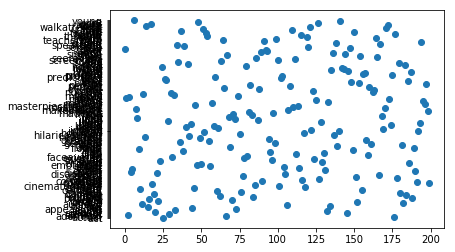

In [43]:
plt.scatter(X,Y)

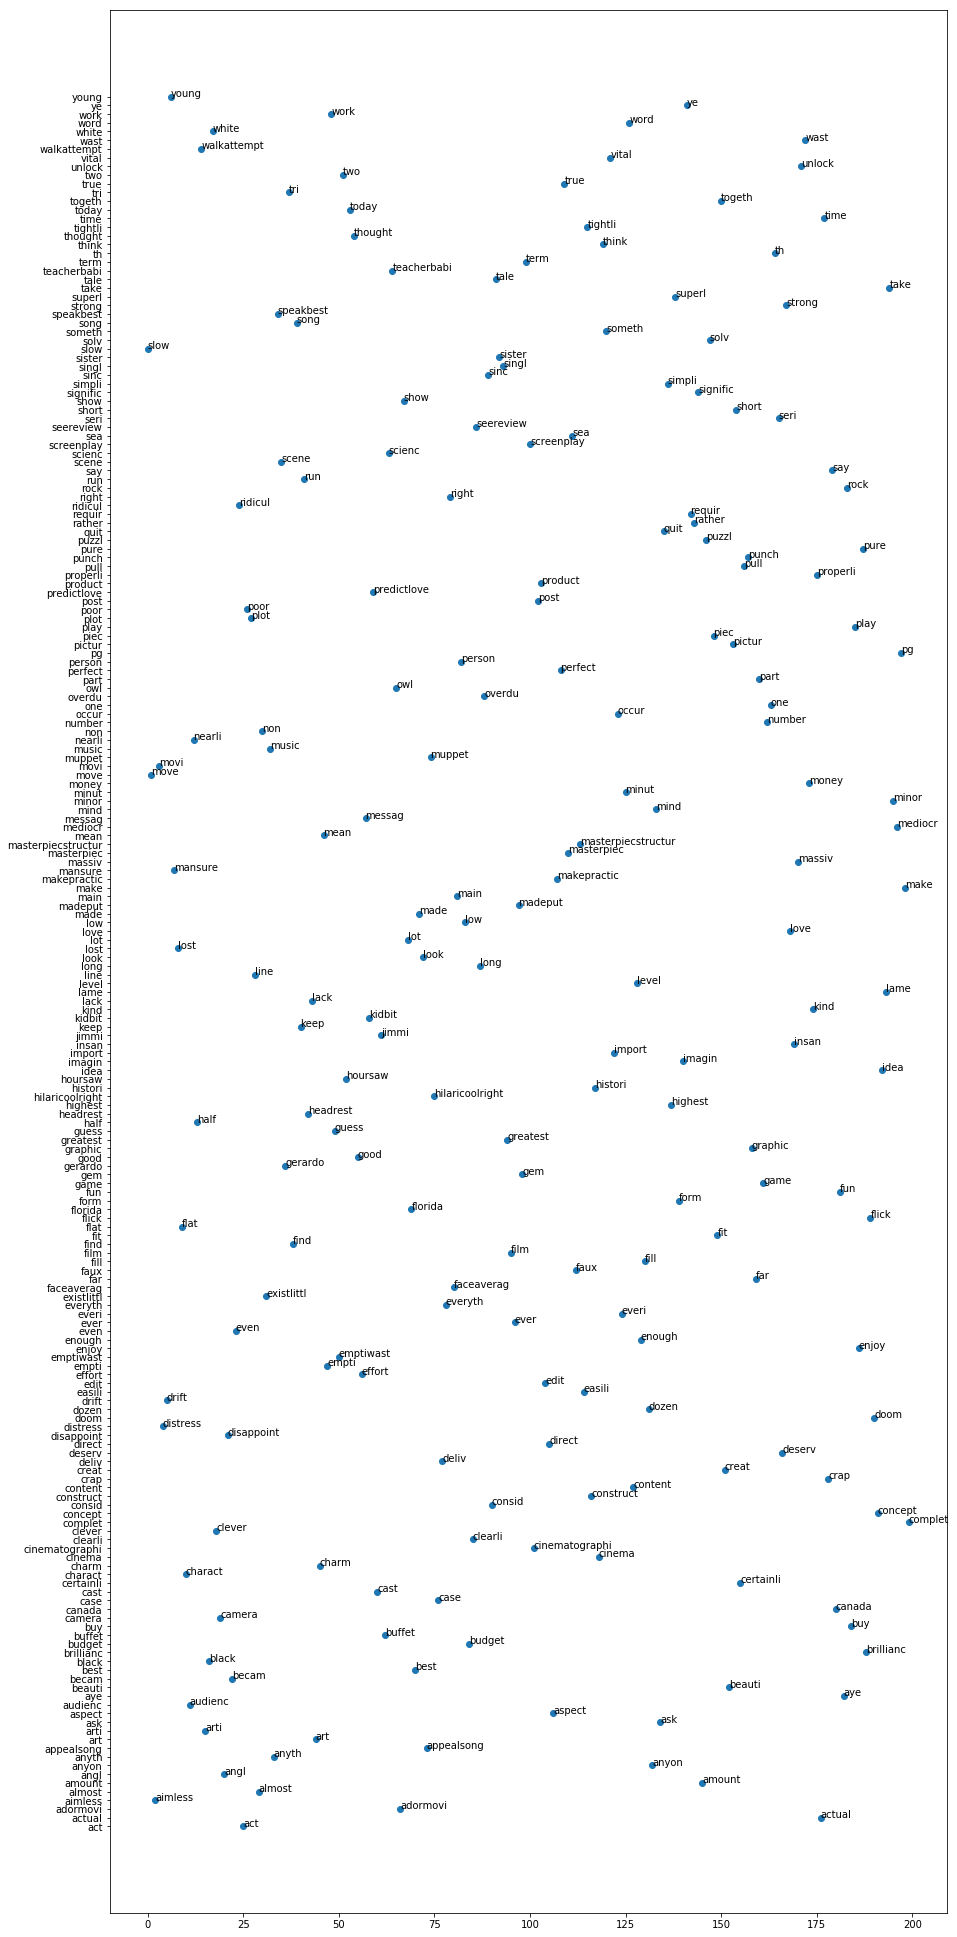

In [44]:
fig, ax = plt.subplots(figsize = (15,35))
ax.scatter(X,Y)

for i, txt in enumerate(words_plot):
    ax.annotate(txt, (X[i],Y[i]))

0


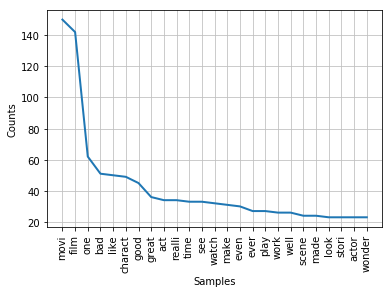

In [45]:

tokens = nltk.word_tokenize(corpus_combine)
freq = FreqDist(tokens)
print(freq['i'])
freq.plot(25, cumulative=False)